In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [5]:

df = pd.read_csv(r'C:\Users\Ahmed Shafique\Documents\Projects\AI-in-forex-trading\Datasets\30min\September 2024 30min dataset.csv', sep=',', header=None)
df.columns = ['date', 'open', 'high', 'low', 'close']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
prices = df['close'].values.reshape(-1, 1)

In [6]:

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
def create_lstm_data(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
x, y = create_lstm_data(prices_scaled, time_steps)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [7]:
train_size = int(0.8 * len(x))
x_train, x_test = x[0:train_size], x[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)
predictions = model.predict(x_test)
mse = model.evaluate(x_test, y_test)
print(f'MSE: {mse}')

Epoch 1/50
13/13 [==============================] - 3s 8ms/step - loss: 0.0634
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 8/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 11/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 12/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 13/50
13/13 [==============================

In [8]:
last_prices = prices_scaled[-time_steps:]
last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
predicted_price_scaled = model.predict(x_pred)
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(f'Predicted price: {predicted_price}')

1/1 [==============================] - 0s 15ms/step
Predicted price: [[1.0817332]]


In [9]:
future_prices = np.zeros((10, 1))

for i in range(10):
    last_prices = prices_scaled[-time_steps:]
    last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
    x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
    x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
    predicted_price_scaled = model.predict(x_pred)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    future_prices[i] = predicted_price
    prices_scaled = np.vstack((prices_scaled, predicted_price_scaled))

# Print the predicted prices for the next 5 hours
print(f'Predicted prices for the next 5 hours: {future_prices}')

1/1 [==============================] - 0s 13ms/step
Predicted prices for the next 5 hours: [[1.08173323]
 [1.08099508]
 [1.08090591]
 [1.08090091]
 [1.08099222]
 [1.08109403]
 [1.08127308]
 [1.08152997]
 [1.08195782]
 [1.08290422]]


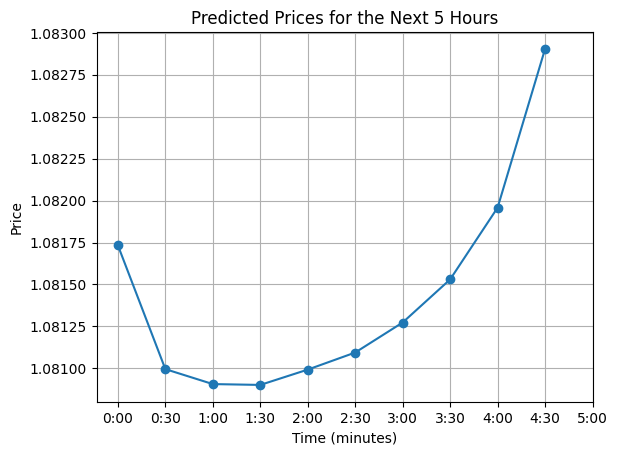

In [12]:
import matplotlib.pyplot as plt

time = np.arange(10) * 30  
plt.plot(time, future_prices, marker='o')
plt.title('Predicted Prices for the Next 5 Hours')
plt.xlabel('Time (minutes)')
plt.ylabel('Price')
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
           ['0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00'])

plt.grid(True)
plt.show()